# From DataFrame to Knowledge Graph

> Visualize the relationships of biblical figures in a knowledge graph using networkx.

[Bible Data](https://www.kaggle.com/datasets/bradystephenson/bibledata?resource=download&select=BibleData-PersonRelationship.csv)

[Medium article - Create a Network Graph in Power BI](https://medium.com/data-science-nerd/from-dataframe-to-knowledge-graph-d3cd65b18b15) 

# Environment

Install pandas, matplotlib, networkx, and scipy if needed.

`pip install pandaa matplotlib networkx scipy`

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Data Acquisition

In [2]:
# Get the data
df = pd.read_csv('../data/BibleData-PersonRelationship.csv')

# Data Wrangling

In [3]:
# Take a sneak peek
df.head()

,person_relationship_id,person_relationship_sequence,person_id_1,relationship_type,person_id_2,relationship_category,reference_id,relationship_notes
0,YHVH_1:Adam_1:1,1,YHVH_1,Creator,Adam_1,explicit,GEN 2:7,NaN
1,Adam_1:YHVH_1:2,2,Adam_1,creation,YHVH_1,inferred,GEN 2:7,NaN
2,Adam_1:Eve_1:3,3,Adam_1,husband,Eve_1,explicit,GEN 3:6,NaN
3,Eve_1:Adam_1:4,4,Eve_1,wife,Adam_1,explicit,GEN 2:25,NaN
4,Adam_1:Cain_1:5,5,Adam_1,father,Cain_1,inferred,GEN 4:1,NaN


The dataframe must have three columns following this format:  
> Source, Relationship, Target

In [4]:
# Select columns
df = df[['person_id_1', 'relationship_type', 'person_id_2']]

In [5]:
df.head()

,person_id_1,relationship_type,person_id_2
0,YHVH_1,Creator,Adam_1
1,Adam_1,creation,YHVH_1
2,Adam_1,husband,Eve_1
3,Eve_1,wife,Adam_1
4,Adam_1,father,Cain_1


# Visualization

In [6]:
# Create the graph
G = nx.Graph()

In [7]:
# Add edges to the graph from the DataFrame
for idx, row in df.iterrows():
    G.add_edge(row['person_id_1'], row['person_id_2'], relationship=row['relationship_type'])

## Basic Graph

{('YHVH_1',
  'Adam_1'): Text(-0.019971378238778703, -0.1526195069372991, 'creation'),
 ('YHVH_1',
  'Abram_1'): Text(0.03203859729199032, -0.06275965271227646, 'servant'),
 ('YHVH_1',
  'Er_1'): Text(-0.030699842609464678, -0.0909075736999514, 'killed by'),
 ('YHVH_1',
  'Onan_1'): Text(-0.030571389012038486, -0.09097874537110351, 'killed by'),
 ('YHVH_1',
  'Moses_1'): Text(0.005750128633448703, -0.024444321928160484, 'servant'),
 ('YHVH_1',
  'Caleb_1'): Text(-0.054612121028867255, -0.14325984784863988, 'servant'),
 ('YHVH_1',
  'the captain of the host of the LORD_1'): Text(-0.030222742818295734, -0.12081393972039223, 'army captain'),
 ('YHVH_1',
  'David_1'): Text(0.01960280827812233, -0.12154461640559466, 'servant'),
 ('YHVH_1',
  'Job_1'): Text(-0.04958556413267923, -0.13795983769027798, 'servant'),
 ('YHVH_1',
  'Isaiah_1'): Text(-0.04790703207848179, -0.14083410174483724, 'servant'),
 ('YHVH_1',
  'Eliakim_1'): Text(-0.039775393065837994, -0.15168927112335984, 'servant'),
 ('Y

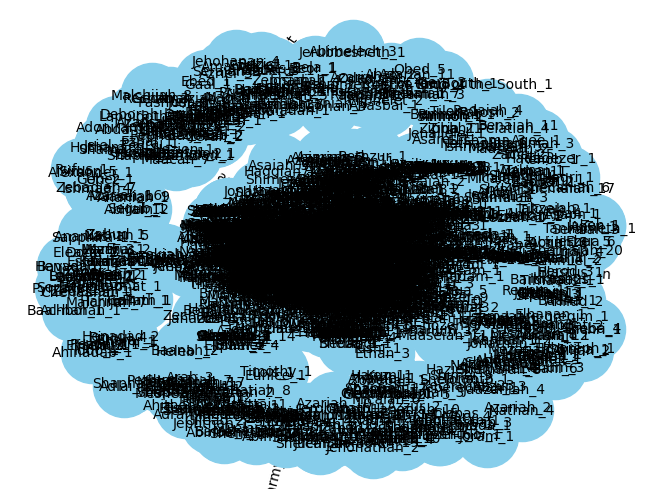

In [8]:
# Visualize the graph
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [9]:
df.head()

,person_id_1,relationship_type,person_id_2
0,YHVH_1,Creator,Adam_1
1,Adam_1,creation,YHVH_1
2,Adam_1,husband,Eve_1
3,Eve_1,wife,Adam_1
4,Adam_1,father,Cain_1


## Connections

{('Abel_1', 'Adam_1'): Text(-0.16993476710334243, 0.11122192643566631, 'son'),
 ('Abel_1', 'Eve_1'): Text(-0.38633176336350145, 0.1531733320062013, 'son'),
 ('Abel_1',
  'Cain_1'): Text(-0.2824939440974868, -0.09058230139086698, 'killed by'),
 ('Seth_1', 'Adam_1'): Text(-0.1087738316681659, -0.17994337423204598, 'son'),
 ('Seth_1', 'Eve_1'): Text(-0.32518111890433876, -0.13799588156967907, 'son'),
 ('Cain_1', 'Adam_1'): Text(0.10278055831641464, -0.11999195085256265, 'son'),
 ('Cain_1', 'Eve_1'): Text(-0.11362563884960952, -0.07804188778212579, 'son'),
 ('Eve_1',
  'Adam_1'): Text(-0.0010521920379078509, 0.12376271048694498, 'wife'),
 ('YHVH_1',
  'Adam_1'): Text(0.6076641931832576, 0.2285705135320708, 'creation')}

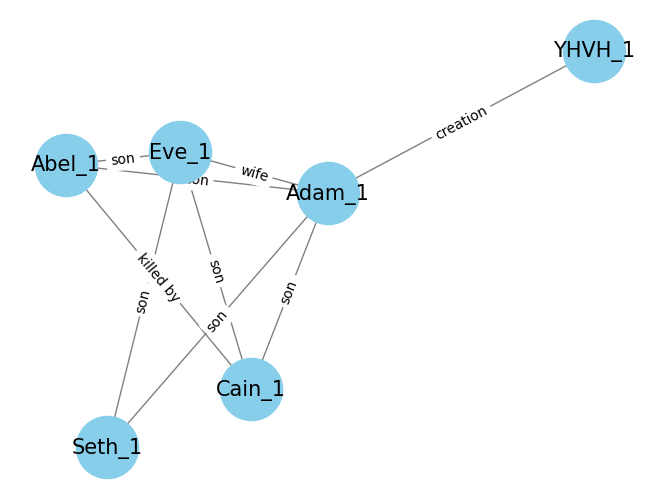

In [10]:
# Get the neighbors of 'Adam_1'
neighbors = list(G['Adam_1'])  # Neighbors of Adam_1

# Create a subgraph containing Adam_1 and its neighbors
subgraph_nodes = ['Adam_1'] + neighbors  # Include Adam_1 and its neighbors
subgraph = G.subgraph(subgraph_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)  # Layout for positioning nodes
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=15)

# Optionally add edge labels (if there are any)
edge_labels = nx.get_edge_attributes(subgraph, 'relationship')  # Assuming edges have a 'relationship' attribute
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

plt.show()

In [11]:
df.head(100)

,person_id_1,relationship_type,person_id_2
0,YHVH_1,Creator,Adam_1
1,Adam_1,creation,YHVH_1
2,Adam_1,husband,Eve_1
3,Eve_1,wife,Adam_1
4,Adam_1,father,Cain_1
5,Cain_1,son,Adam_1
6,Eve_1,mother,Cain_1
7,Cain_1,son,Eve_1
8,Adam_1,father,Abel_1
9,Abel_1,son,Adam_1


## Shortest Path

In [12]:
try:
    # Find the shortest path from Adam_1 to Lamech_1
    shortest_path = nx.shortest_path(G, source="Adam_1", target="Lamech_1")
    print("Shortest path from Adam_1 to Lamech_1:", shortest_path)
except nx.NetworkXNoPath:
    print("No path exists between Adam_1 and Lamech_1.")

Shortest path from Adam_1 to Lamech_1: ['Adam_1', 'Cain_1', 'Enoch_1', 'Irad_1', 'Mehujael_1', 'Methushael_1', 'Lamech_1']


In [13]:
path_length = nx.shortest_path_length(G, source="Adam_1", target="Lamech_1")
print("Length of the shortest path:", path_length)

Length of the shortest path: 6


{('Methushael_1',
  'Mehujael_1'): Text(-0.5028529837434823, -0.5202736914862547, 'son'),
 ('Methushael_1',
  'Lamech_1'): Text(-0.7816105220439417, -0.848074182140744, 'son'),
 ('Irad_1', 'Enoch_1'): Text(0.153320762870383, 0.19201979799046098, 'son'),
 ('Irad_1',
  'Mehujael_1'): Text(-0.1846454226798283, -0.16346166267390783, 'son'),
 ('Cain_1', 'Adam_1'): Text(0.8036734686214348, 0.8282576418007883, 'son'),
 ('Cain_1', 'Enoch_1'): Text(0.4928819335617223, 0.5296764491165658, 'son')}

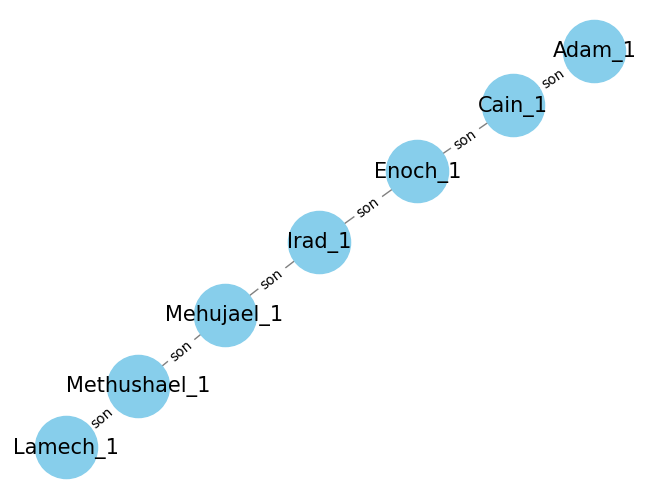

In [14]:
try:
    # Find the shortest path from Adam_1 to Lamech_1
    shortest_path = nx.shortest_path(G, source="Adam_1", target="Lamech_1")
    
    # Create a subgraph containing only the nodes and edges of the shortest path
    subgraph_nodes = set(shortest_path)  # Nodes in the shortest path
    for i in range(len(shortest_path) - 1):
        subgraph_nodes.add(shortest_path[i])
        subgraph_nodes.add(shortest_path[i+1])
    
    subgraph = G.subgraph(subgraph_nodes).copy()
    
    # Visualize the subgraph
    pos = nx.spring_layout(subgraph)  # Layout for positioning nodes
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=15)
    edge_labels = nx.get_edge_attributes(subgraph, 'relationship')  # Assuming edges have a 'relationship' attribute
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
    
    plt.show()

except nx.NetworkXNoPath:
    print("No path exists between Adam_1 and Lamech_1.")

Talk about patriarchy...  

:-)

# Notes

Networkx can do a lot more! For more information, visit: https://networkx.org/documentation/stable/tutorial.html.